In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [3]:
df=pd.read_csv("C:/Users/laksh/Downloads/used_car_dataset.csv")

In [4]:
df.describe()

,Year,Age
count,9582.000000,9582.000000
mean,2016.361094,7.638906
std,4.087226,4.087226
min,1986.000000,0.000000
25%,2014.000000,5.000000
50%,2017.000000,7.000000
75%,2019.000000,10.000000
max,2024.000000,38.000000


In [5]:
df.isnull().sum()

Brand            0
model            0
Year             0
Age              0
kmDriven        47
Transmission     0
Owner            0
FuelType         0
PostedDate       0
AdditionInfo     0
AskPrice         0
dtype: int64

In [6]:
df.duplicated().sum()

724

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"
...,...,...,...,...,...,...,...,...,...,...,...
9577,Skoda,Octavia,2014,10,"105,904 km",Automatic,second,Diesel,Oct-24,"Skoda Octavia 1.9 Elegance TDI, 2014, Diesel","₹ 10,40,000"
9578,Maruti Suzuki,Alto-800,2020,4,"55,000 km",Manual,first,Hybrid/CNG,Nov-24,"Maruti Suzuki Alto 800 CNG LXI Optional, 2020,...","₹ 3,75,000"
9579,Maruti Suzuki,Ritz,2013,11,"92,000 km",Manual,first,Diesel,Nov-24,"Maruti Suzuki Ritz VDi, 2013, Diesel","₹ 4,15,000"
9580,Hyundai,Verna,2019,5,"72,000 km",Automatic,first,Petrol,Oct-24,"Hyundai Verna VTVT 1.6 AT SX Option, 2019, Petrol","₹ 8,55,000"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8858 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         8858 non-null   object
 1   model         8858 non-null   object
 2   Year          8858 non-null   int64 
 3   Age           8858 non-null   int64 
 4   kmDriven      8812 non-null   object
 5   Transmission  8858 non-null   object
 6   Owner         8858 non-null   object
 7   FuelType      8858 non-null   object
 8   PostedDate    8858 non-null   object
 9   AdditionInfo  8858 non-null   object
 10  AskPrice      8858 non-null   object
dtypes: int64(2), object(9)
memory usage: 830.4+ KB


In [10]:
df["Brand"].unique()

array(['Honda', 'Toyota', 'Volkswagen', 'Maruti Suzuki', 'BMW', 'Ford',
       'Kia', 'Mercedes-Benz', 'Hyundai', 'Audi', 'Renault', 'MG',
       'Volvo', 'Skoda', 'Tata', 'Mahindra', 'Mini', 'Land Rover', 'Jeep',
       'Chevrolet', 'Jaguar', 'Fiat', 'Aston Martin', 'Porsche', 'Nissan',
       'Force', 'Mitsubishi', 'Lexus', 'Isuzu', 'Datsun', 'Ambassador',
       'Rolls-Royce', 'ICML', 'Bajaj', 'Opel', 'Ashok', 'Bentley',
       'Ssangyong', 'Maserati'], dtype=object)

In [89]:
top_10_brands = df["Brand"].value_counts().head(10)
filtered_df = df[df["Brand"].isin(top_10_brands.index)]

Text(0.5, 1.0, 'Top 10 Brands')

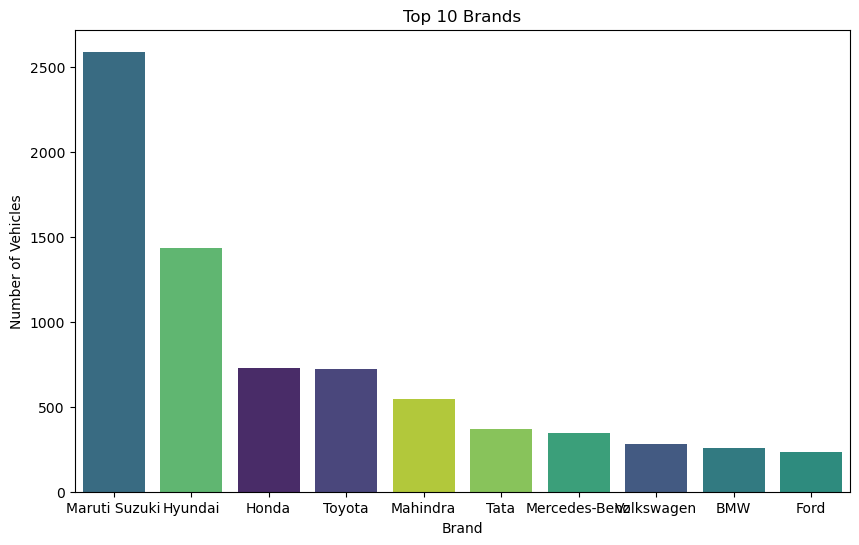

In [99]:
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x="Brand", order=top_10_brands.index, hue="Brand",palette="viridis", dodge=False )
plt.legend([], [], frameon=False)
plt.ylabel("Number of Vehicles")
plt.title('Top 10 Brands')

In [13]:
df["Car"] =df["Brand"] + " " + df["model"]

In [14]:
top_10_cars = df["Car"].value_counts().head(10)

Text(0.5, 1.0, 'Top 10 Selling Cars')

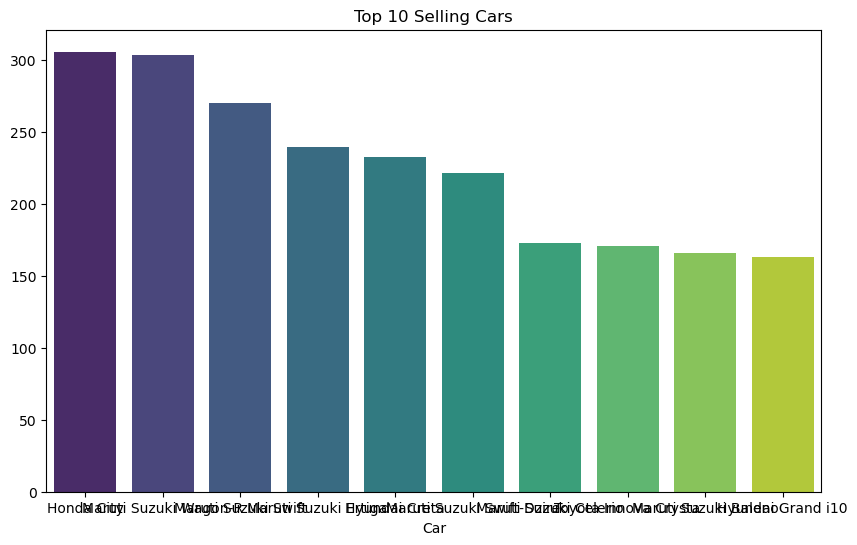

In [97]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_cars.index, y=top_10_cars.values, hue=top_10_cars.index, palette="viridis", legend=False)
plt.title("Top 10 Selling Cars")

In [16]:
year_counts = df["Year"].value_counts().sort_index()

Text(0, 0.5, 'Number of Cars')

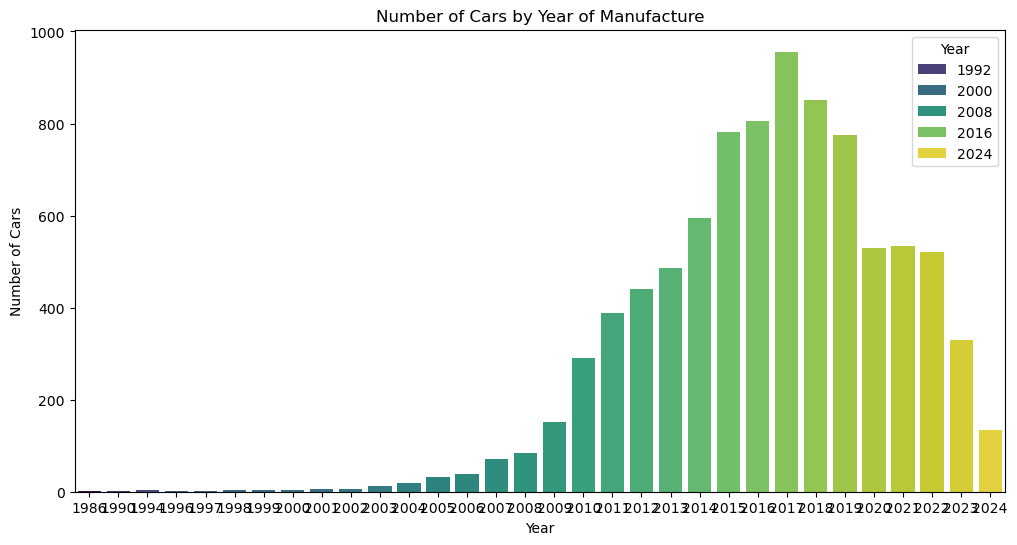

In [103]:
plt.figure(figsize=(12, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, hue=year_counts.index, palette="viridis")
plt.title("Number of Cars by Year of Manufacture")
plt.ylabel("Number of Cars")

In [18]:
owner_counts =df["Owner"].value_counts()

Text(0.5, 1.0, 'Count of Cars by Owner Type')

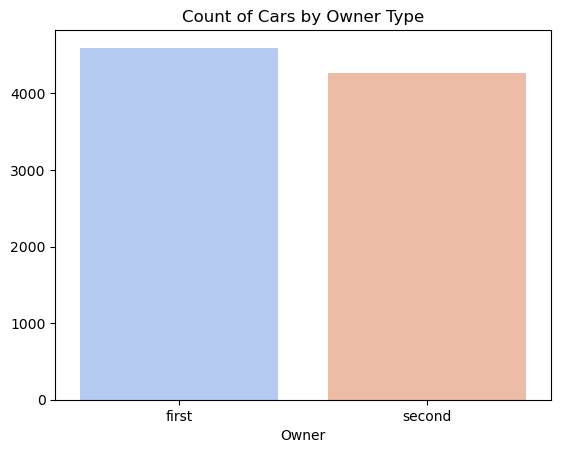

In [107]:
sns.barplot(x=owner_counts.index, y=owner_counts.values, hue=owner_counts.index, palette="coolwarm")
plt.title("Count of Cars by Owner Type")

Text(0.5, 1.0, 'Count of Cars by Fuel Type')

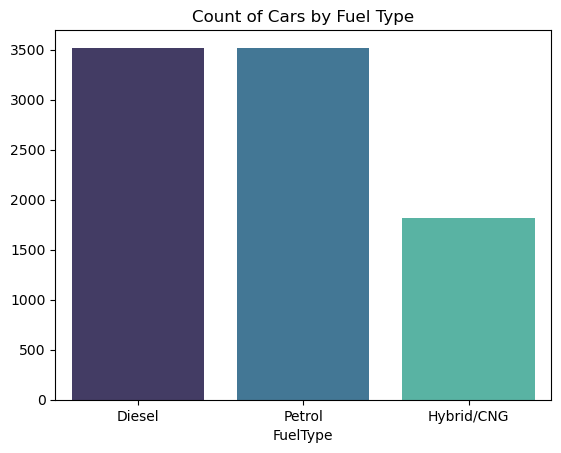

In [113]:
sns.barplot(x=fuel_counts.index, y=fuel_counts.values, hue=fuel_counts.index, palette="mako")
plt.title("Count of Cars by Fuel Type")

In [22]:
transmission_counts = df["Transmission"].value_counts()

Text(0.5, 1.0, 'Count of Cars by Transmission Type')

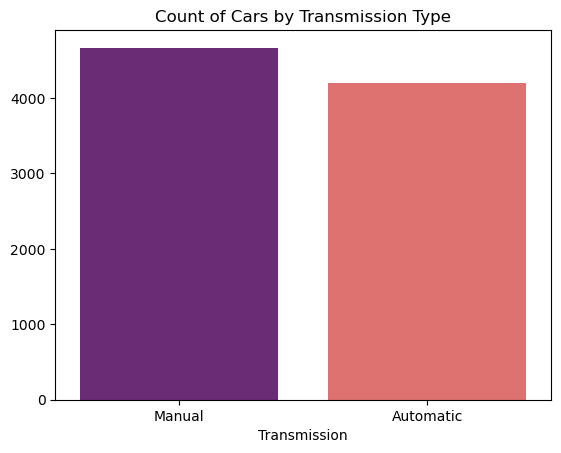

In [117]:
sns.barplot(x=transmission_counts.index, y=transmission_counts.values, hue=transmission_counts.index, palette="magma")
plt.title("Count of Cars by Transmission Type")

In [24]:
df["AskPrice"] = df["AskPrice"].astype(str)
df["AskPrice"] = df["AskPrice"].str.replace("₹", "", regex=False)  
df["AskPrice"] = df["AskPrice"].str.replace(",", "", regex=False)  
df["AskPrice"] = pd.to_numeric(df["AskPrice"])

In [25]:
total_price_by_brand = df.groupby('Brand')['AskPrice'].sum()
top_10_brands = total_price_by_brand.sort_values(ascending=False).head(10)

Text(0, 0.5, 'Total Ask Price (in ₹)')

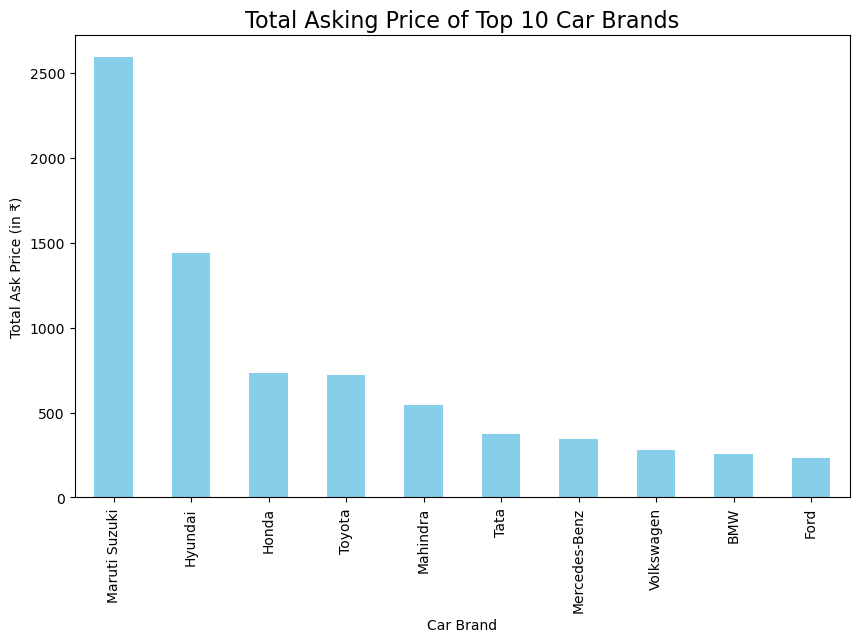

In [133]:
plt.figure(figsize=(10, 6))
top_10_brands.plot(kind='bar', color='skyblue')
plt.title("Total Asking Price of Top 10 Car Brands", fontsize=16)
plt.xlabel("Car Brand")
plt.ylabel("Total Ask Price (in ₹)")

In [127]:
import seaborn as sns
import pandas as pd  # Assuming you have your data in a pandas DataFrame

# Assuming 'top_10_brands' is a DataFrame with columns for car brands and total asking price

sns.barplot(x="Car Brand", y="Total Ask Price (in ₹)", data=top_10_brands, color='skyblue')
plt.title("Total Asking Price of Top 10 Car Brands", fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.